<a href="https://colab.research.google.com/github/tranquocdienspkt/AIspkt/blob/main/W11_14_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

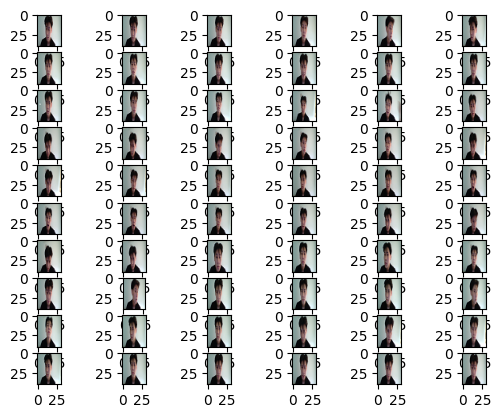

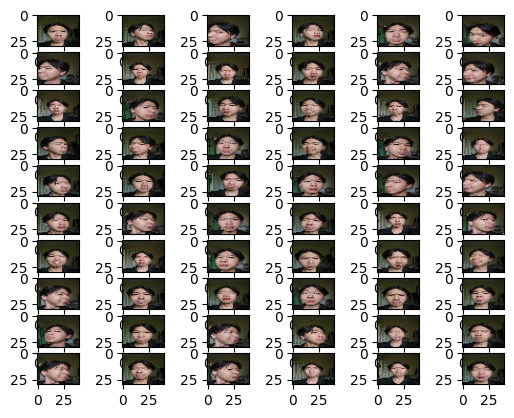

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/60/'

for i in range(60):
    plt.subplot(10, 6, i+1)
    filename = folder + 'Dien ('+str(i+1)+').png'
    img = imread(filename)
    plt.imshow(img)
plt.show()

for i in range(60):
    plt.subplot(10, 6, i+1)
    filename = folder + 'Danh ('+str(i+1)+').jpg'
    img = imread(filename)
    plt.imshow(img)
plt.show()

In [3]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

folder = '/content/drive/MyDrive/60/'
photos, labels = list(), list()
for afile in listdir(folder):
  output = 0.0
  if afile.startswith("Dien"):
    output = 1.0
  if afile.startswith("Danh"):
    output = 2.0
  img = load_img(folder + afile, target_size=(200,200))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save("Dien_Danh_photos.npy", photos)
save("Dien_Danh_labels.npy", labels)

(120, 200, 200, 3) (120,)


In [4]:
import numpy as np
np.load('/content/Dien_Danh_labels.npy')
np.load('/content/Dien_Danh_photos.npy')

array([[[[ 42.,  40.,  28.],
         [ 42.,  40.,  28.],
         [ 42.,  40.,  28.],
         ...,
         [ 35.,  38.,  21.],
         [ 35.,  38.,  21.],
         [ 35.,  38.,  21.]],

        [[ 42.,  40.,  28.],
         [ 42.,  40.,  28.],
         [ 42.,  40.,  28.],
         ...,
         [ 35.,  38.,  21.],
         [ 35.,  38.,  21.],
         [ 35.,  38.,  21.]],

        [[ 42.,  40.,  28.],
         [ 42.,  40.,  28.],
         [ 42.,  40.,  28.],
         ...,
         [ 35.,  38.,  21.],
         [ 35.,  38.,  21.],
         [ 35.,  38.,  21.]],

        ...,

        [[ 24.,  29.,  25.],
         [ 24.,  29.,  25.],
         [ 24.,  29.,  25.],
         ...,
         [  5.,   6.,   8.],
         [  5.,   6.,   8.],
         [  5.,   6.,   8.]],

        [[ 24.,  29.,  25.],
         [ 24.,  29.,  25.],
         [ 24.,  29.,  25.],
         ...,
         [  5.,   6.,   8.],
         [  5.,   6.,   8.],
         [  5.,   6.,   8.]],

        [[ 24.,  29.,  25.],
       

4422102/4422102 [==============================] - 0s 0us/step


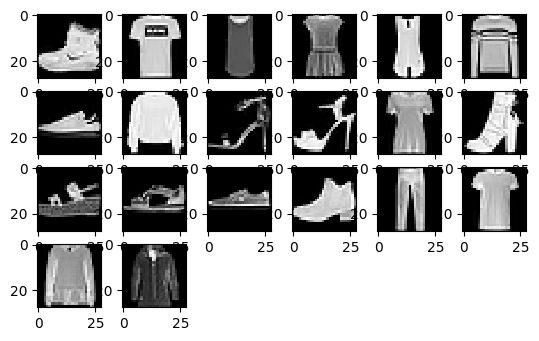

(60000, 10)
(10000, 10)


In [5]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

for i in range(20):
    plt.subplot(5, 6, i + 1)
    plt.imshow(x_train[i],cmap='gray',
               interpolation='none')
plt.show()

x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28, 1)
x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32') / 255

y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

In [6]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (28,28,1), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(128,(3,3), activation='linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [7]:
from keras.losses import categorical_crossentropy

model.compile(loss = categorical_crossentropy,  optimizer = Adam(), metrics = ['accuracy'])

train = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
938/938 [==============================] - 15s 6ms/step - loss: 0.4345 - accuracy: 0.8423
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2719 - accuracy: 0.9003
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2264 - accuracy: 0.9167
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1946 - accuracy: 0.9284
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1706 - accuracy: 0.9360
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1473 - accuracy: 0.9451
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1292 - accuracy: 0.9514
Epoch 8/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1112 - accuracy: 0.9581
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0950 - accuracy: 0.9634
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0786 - accuracy: 0.970

In [8]:
model.save('CNN.h5')

Test loss 0.456572026014328
Test accuracy 0.9211000204086304


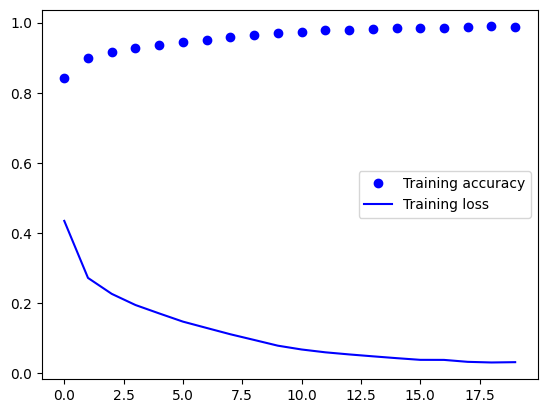

In [13]:
import matplotlib.pyplot as plt

test = model.evaluate(x_test, y_test, verbose=0)
print('Test loss', test[0])
print('Test accuracy', test[1])
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.legend()
plt.show()